In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for text processing
import re
import nltk
nltk.download('stopwords')

# for removing common words
from nltk.corpus import stopwords

# for word stemming
from nltk.stem.porter import PorterStemmer

# for text feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# Loading dataset
df = pd.read_csv('./fake-real-job/fake_job_postings.csv')

# Show the first 5 rows of the dataset
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mimi_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [2]:
# Show the alst 5 rows of the dataset
df.tail()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0
17879,17880,Web Application Developers,"NZ, N, Wellington",Engineering,NaN,Vend is looking for some awesome new talent to...,Who are we?Vend is an award winning web based ...,We want to hear from you if:You have an in-dep...,NaN,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Engineering,0


In [3]:
# Show the number of rows and columns the data contains
df.shape

(17880, 18)

In [4]:
# Show quick overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [5]:
# Drop the 'job_id' column
df = df.drop(columns=['job_id'])

In [6]:
# Show again the first 5 rows to show that the column job_id is dropped
df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [7]:
# Show the statistical properties using describe
df.describe()

,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000
mean,0.042897,0.795302,0.491723,0.048434
std,0.202631,0.403492,0.499945,0.214688
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


## Removing Duplicates

In [8]:
# Check for duplicates and produce a total count
df.duplicated().sum()

281

In [9]:
# Drop the duplicates
df = df.drop_duplicates()

In [10]:
# Recheck the duplicate counts to make sure they are dropped
df.duplicated().sum()

0

## Making DataFrame for Categorical Columns and For Numerical Columns

In [11]:
# Retrieving the names of columns
df.select_dtypes(include='object').columns


Index(['title', 'location', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function'],
      dtype='object')

In [12]:
object_columns_df = df.select_dtypes(include='object')

In [13]:
object_columns_df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Other,Internship,NaN,NaN,Marketing
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,NaN
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider


In [14]:
# Calliing Numerical Columns
df.select_dtypes(include='int').columns

Index(['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent'], dtype='object')

In [15]:
int_columns_df = df.select_dtypes(include='int')

In [16]:
int_columns_df.head()

,telecommuting,has_company_logo,has_questions,fraudulent
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,1,0


## Making DataFrame for Fake Job Posting & Real Job Posting

In [17]:
fake = df[df['fraudulent'] == 1]

In [18]:
fake.head(2)

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
98,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
144,Forward Cap.,NaN,NaN,NaN,NaN,The group has raised a fund for the purchase o...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1


In [19]:
real = df[df['fraudulent'] == 0]

In [20]:
real.head(2)

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0


In [21]:
# Count the occurrences of unique values in the 'fraudulent' column
df['fraudulent'].value_counts()

fraudulent
0    16743
1      856
Name: count, dtype: int64

In [22]:
fake.shape

(856, 17)

In [23]:
real.shape

(16743, 17)

In [24]:
df.shape

(17599, 17)

## Data Visualization

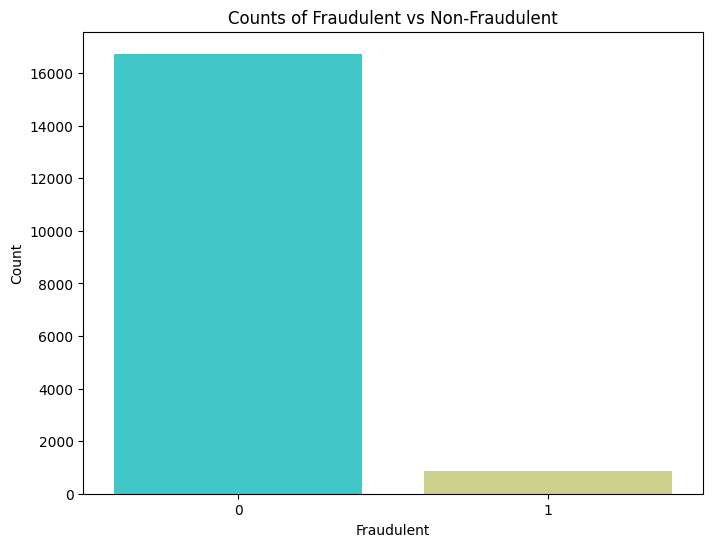

In [25]:
# Count the occurrences of unique values in the 'fraudulent' column
fraudulent_counts = df['fraudulent'].value_counts()

# Plot the counts using a rainbow colro palette
plt.figure(figsize=(8, 6))
sns.barplot(x=fraudulent_counts.index, y=fraudulent_counts.values, palette='rainbow')
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.title('Counts of Fraudulent vs Non-Fraudulent')
plt.savefig("static/images/barplot_fraudulent_count.png")
plt.show()

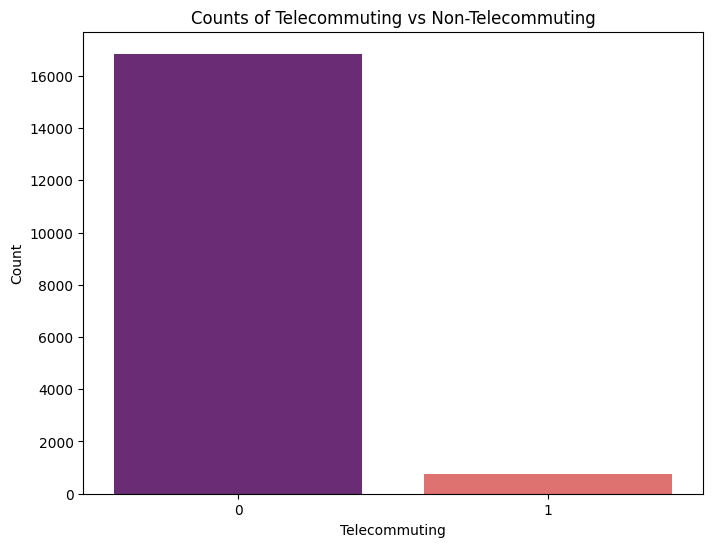

In [26]:
# Count the occurrences of unique values in the 'telecommuting' column
telecommuting_counts = df['telecommuting'].value_counts()

# Plot the counts using a magma color palette
plt.figure(figsize=(8, 6))
sns.barplot(x=telecommuting_counts.index, y=telecommuting_counts.values, palette='magma')
plt.xlabel('Telecommuting')
plt.ylabel('Count')
plt.title('Counts of Telecommuting vs Non-Telecommuting')
plt.savefig("static/images/barplot_telecommuting_count.png")
plt.show()

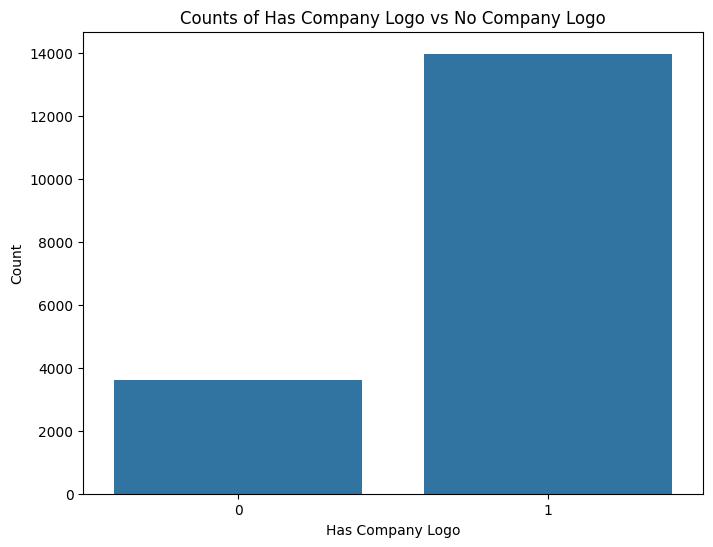

In [27]:
# Count the occurrences of unique values in the 'has_company_logo' column
has_company_logo_counts = df['has_company_logo'].value_counts()

# plot the counts
plt.figure(figsize=(8, 6))
sns.barplot(x=has_company_logo_counts.index, y=has_company_logo_counts.values)
plt.xlabel('Has Company Logo')
plt.ylabel('Count')
plt.title('Counts of Has Company Logo vs No Company Logo')
plt.savefig("static/images/barplot_companylogo_count.png")
plt.show()

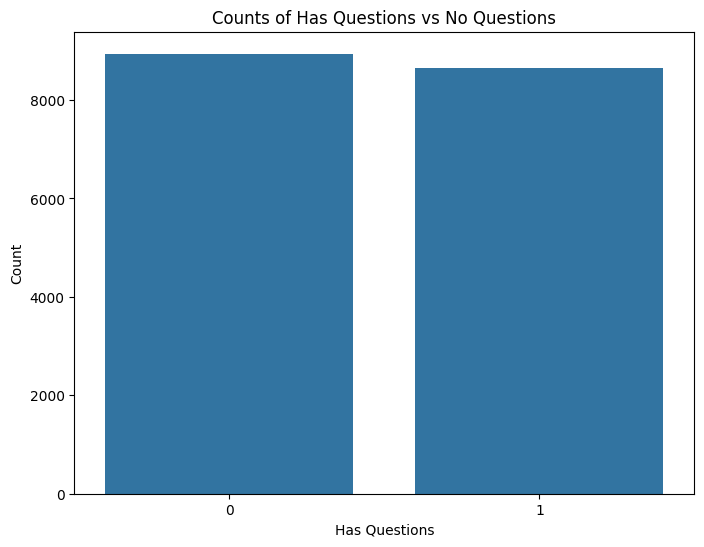

In [28]:
# Count of the occurrances of unique values in the 'has_questions' columnn
has_questions_counts = df['has_questions'].value_counts()

# Plot the counts
plt.figure(figsize=(8, 6))
sns.barplot(x=has_questions_counts.index, y=has_questions_counts.values)
plt.xlabel('Has Questions')
plt.ylabel('Count')
plt.title('Counts of Has Questions vs No Questions')
plt.savefig("static/images/barplot_questions_count.png")
plt.show()

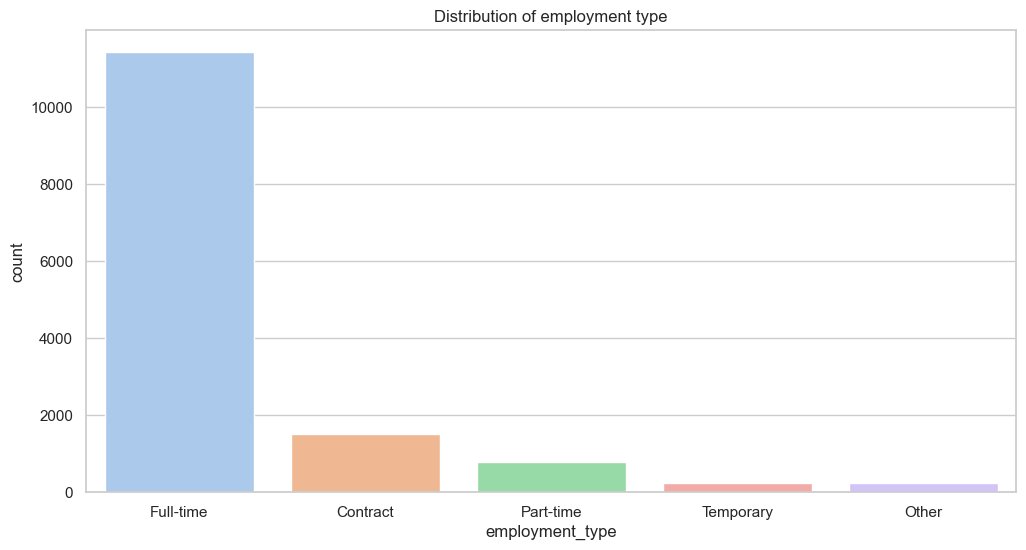

In [29]:
# Visualization of Distribution of 'employment_type'
sns.set_theme(style='whitegrid')
plt.figure(figsize=(12, 6))

# Use countplot to visualize
sns.countplot(x='employment_type', data=df, palette="pastel", order=df['employment_type'].value_counts().index)

plt.title('Distribution of employment type')
plt.savefig("static/images/countplot_employment_type.png")
plt.show()

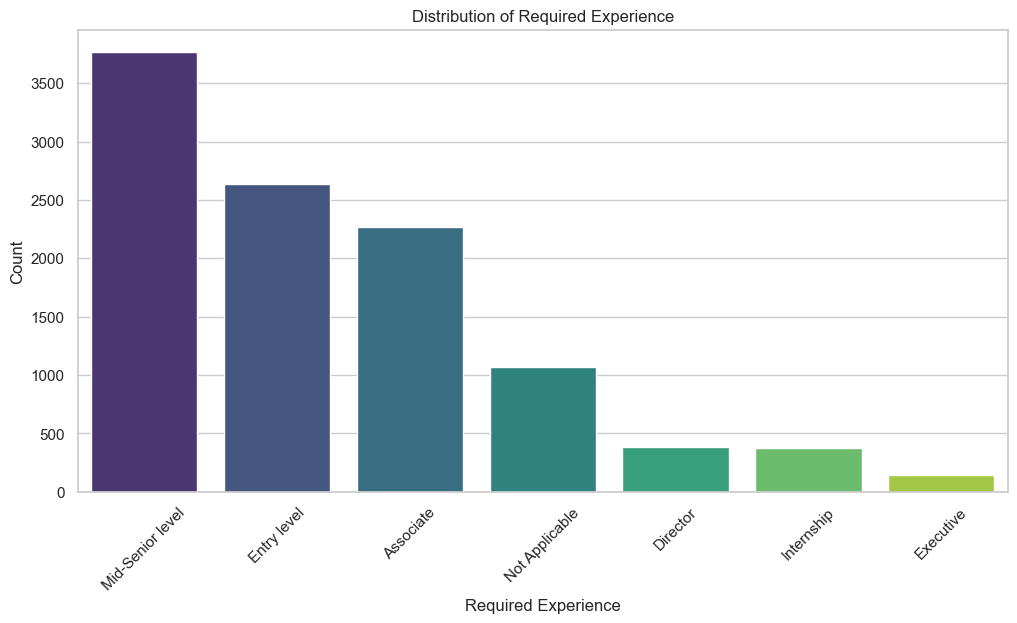

In [30]:
# Count the occurrences of unique values in the 'has_questions' column
required_experience_counts = df['required_experience'].value_counts()

# Plot the counts
plt.figure(figsize=(12, 6))
sns.barplot(x=required_experience_counts.index, y=required_experience_counts.values, palette='viridis')
plt.xlabel('Required Experience')
plt.ylabel('Count')
plt.title('Distribution of Required Experience')
plt.xticks(rotation=45)
plt.savefig("static/images/barplot_required_experience_count.png")
plt.show()

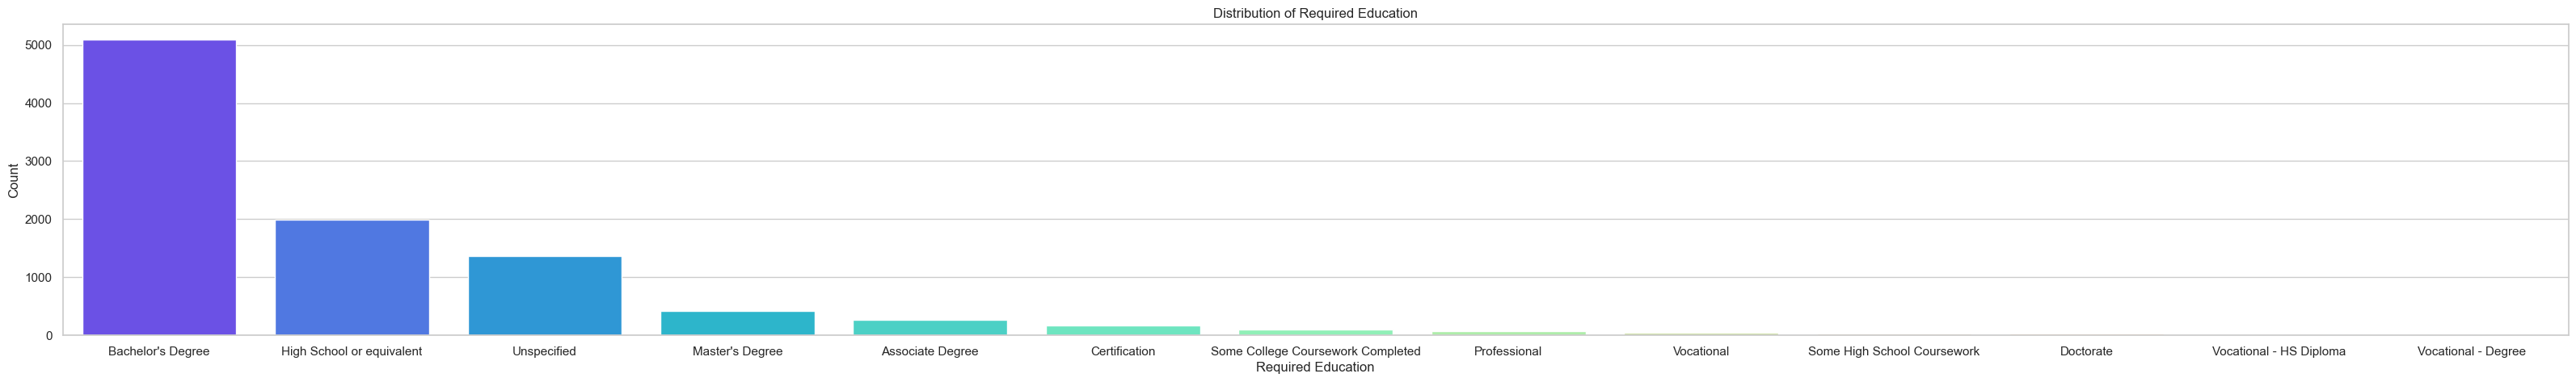

In [31]:
# Count the occurrences of unique values in the 'required_education' column
required_education_counts = df['required_education'].value_counts()

# Plot the counts
plt.figure(figsize=(40, 5))
sns.barplot(x=required_education_counts.index, y=required_education_counts.values, palette='rainbow')
plt.xlabel('Required Education')
plt.ylabel('Count')
plt.title('Distribution of Required Education')
plt.savefig("static/images/barplot_education_count.png")
plt.show()

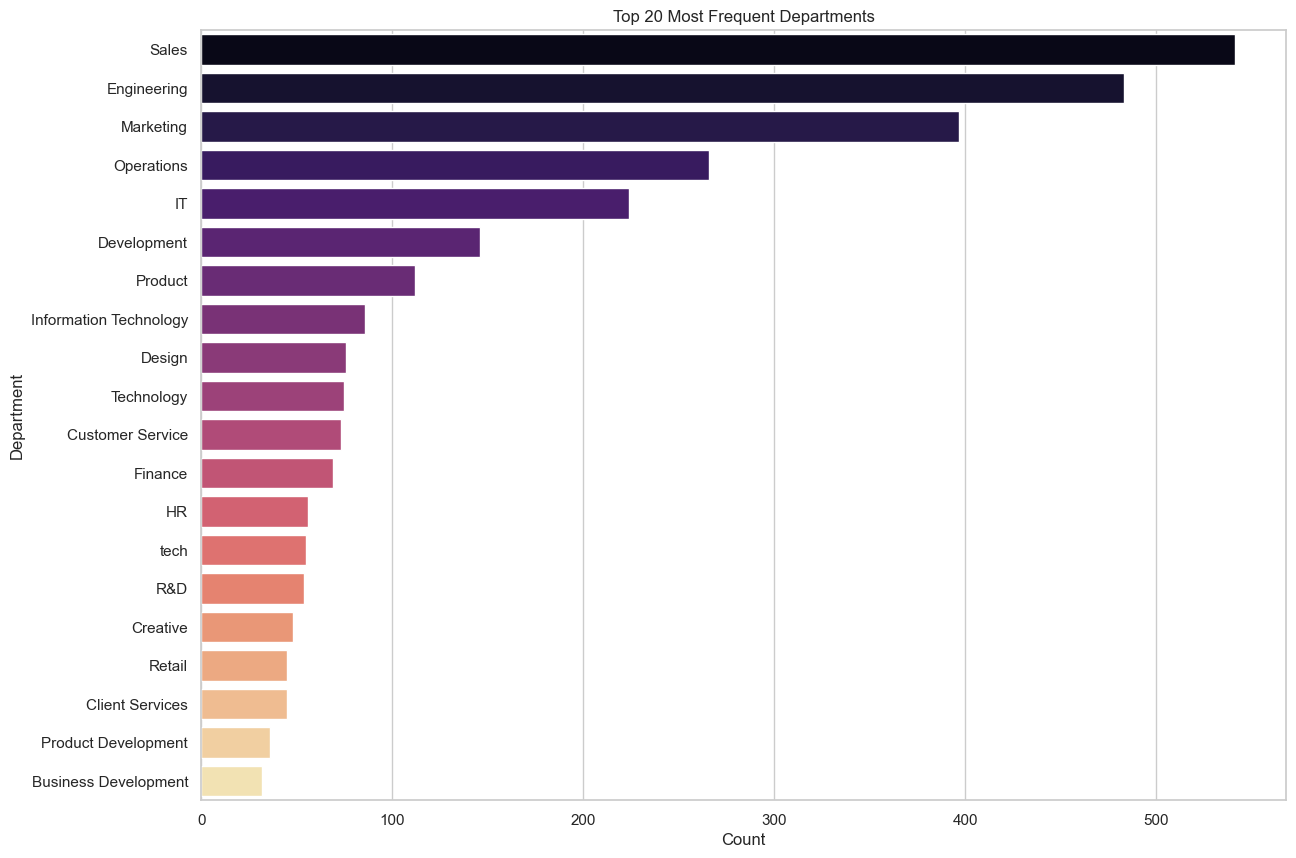

In [32]:
# Count the occurrences of unique values in the 'department' column
department_counts = df['department'].value_counts()

# Select the top 20 most frequent occurrences
top_20_departments = department_counts.head(20)

# Plot the top 50 most frequent occurrences as horizontal bar plot
plt.figure(figsize=(14, 10))
sns.barplot(y=top_20_departments.index, x=top_20_departments.values, palette='magma')
plt.ylabel('Department')
plt.xlabel('Count')
plt.title('Top 20 Most Frequent Departments')
plt.savefig("static/images/barplot_department_count.png")
plt.show()

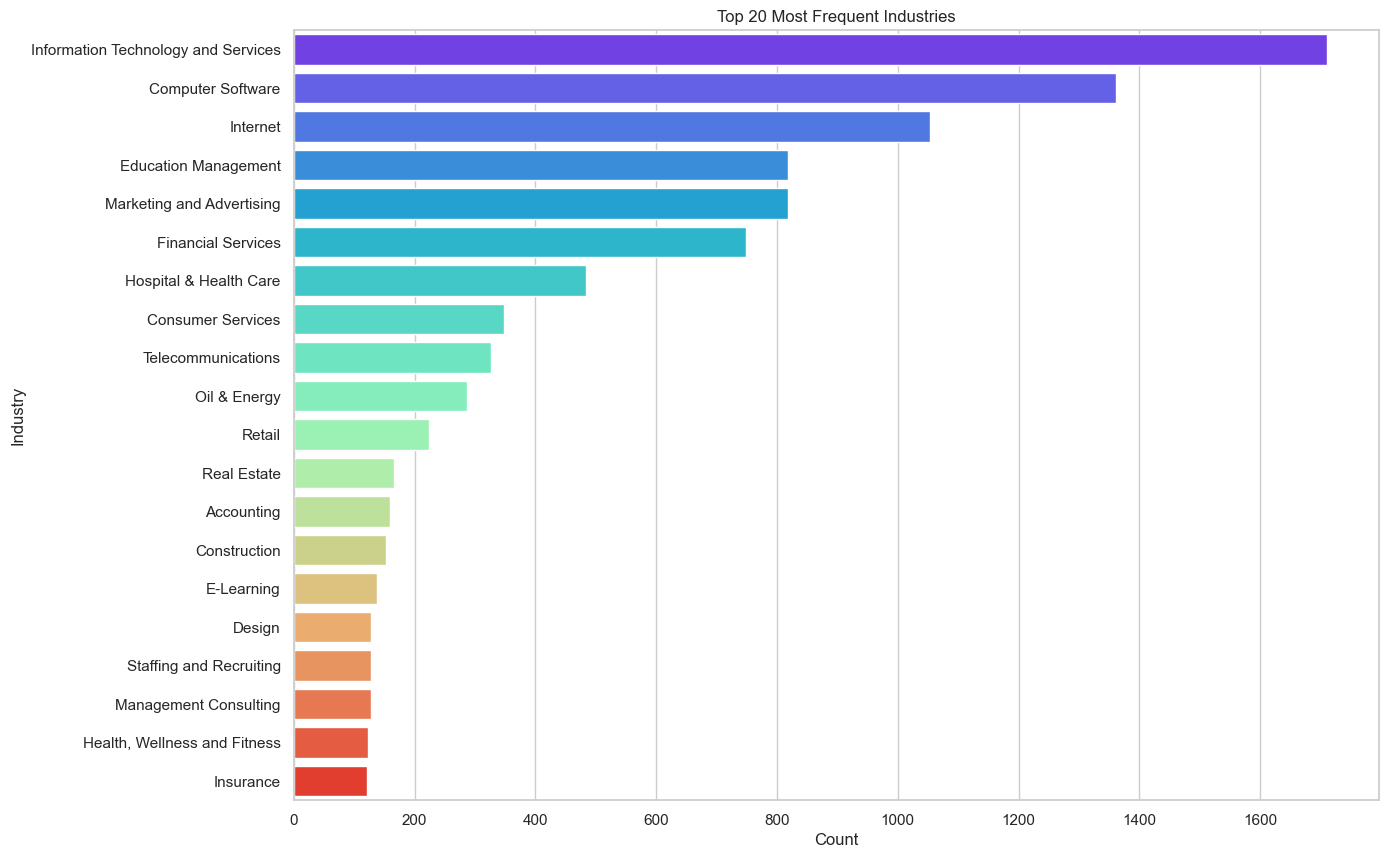

In [33]:
# Count the occurrences of unique values in the 'industry' column
industry_counts = df['industry'].value_counts()

# Select the top 20 most frequent occurrences
top_20_industries = industry_counts.head(20)

# Plot the top 20 most frequent occurrences as horizontal bar plot with rotated labels
plt.figure(figsize=(14, 10))
sns.barplot(y=top_20_industries.index, x=top_20_industries.values, palette='rainbow')
plt.ylabel('Industry')
plt.xlabel('Count')
plt.title('Top 20 Most Frequent Industries')
plt.savefig("static/images/barplot_industry_count.png")
plt.show()

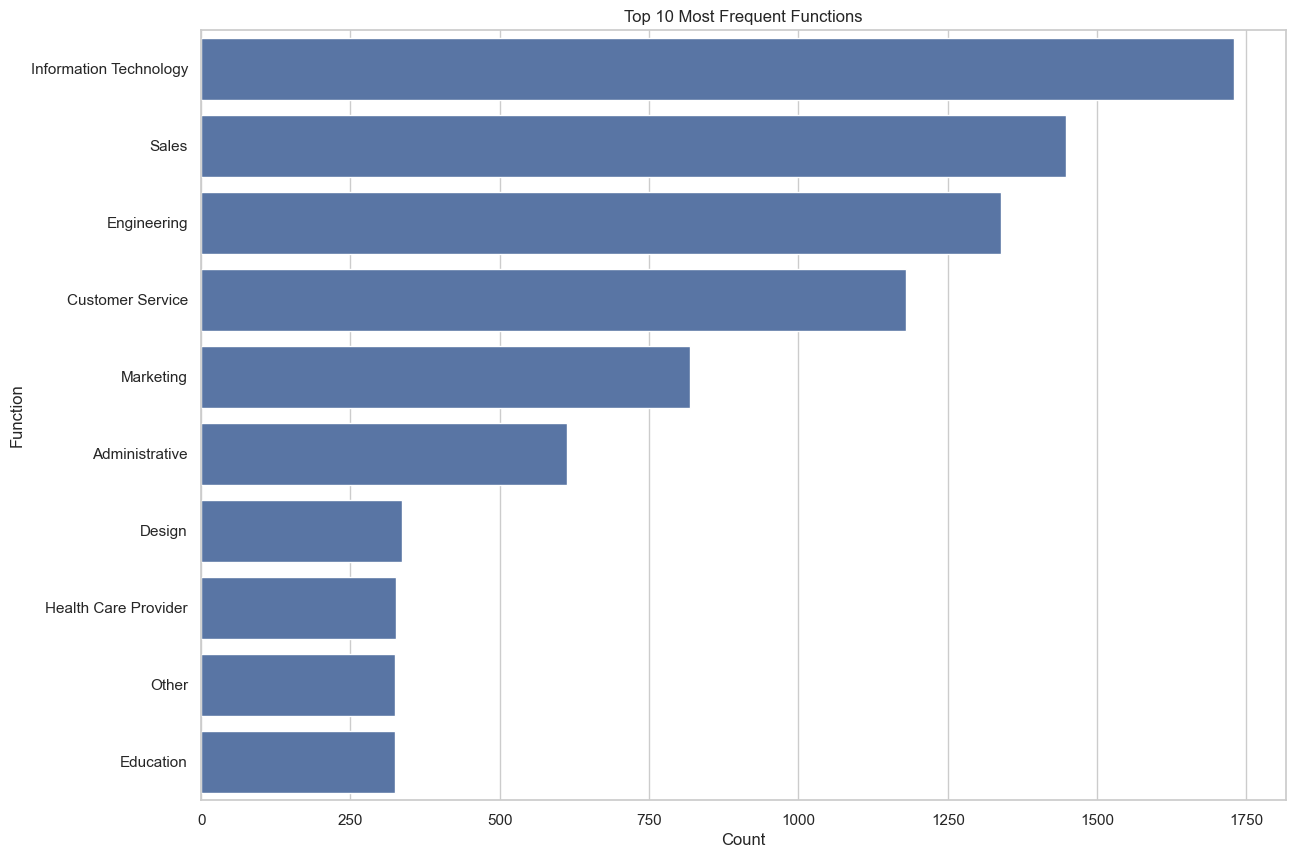

In [34]:
# Count the occurrences of unique values in the 'function' column
function_counts = df['function'].value_counts()

# Select the top 10 most frequent occurrences
top_10_functions = function_counts.head(10)

#Plot the top 10 most frequent occurrences as horizontal bar plot with rotated labels
plt.figure(figsize=(14, 10))
sns.barplot(y=top_10_functions.index, x=top_10_functions.values)
plt.ylabel('Function')
plt.xlabel('Count')
plt.title('Top 10 Most Frequent Functions')
plt.savefig("static/images/barplot_function_count.png")
plt.show()

### Split the 'location' column into separate columns for country and city

In [35]:
# Split the 'location' column into separate columns for country, state, and city
location_split = df['location'].str.split(', ', expand=True)
df['country'] = location_split[0]
df['city'] = location_split[1]

df.head(2)

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,city
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,US,NY
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NZ,


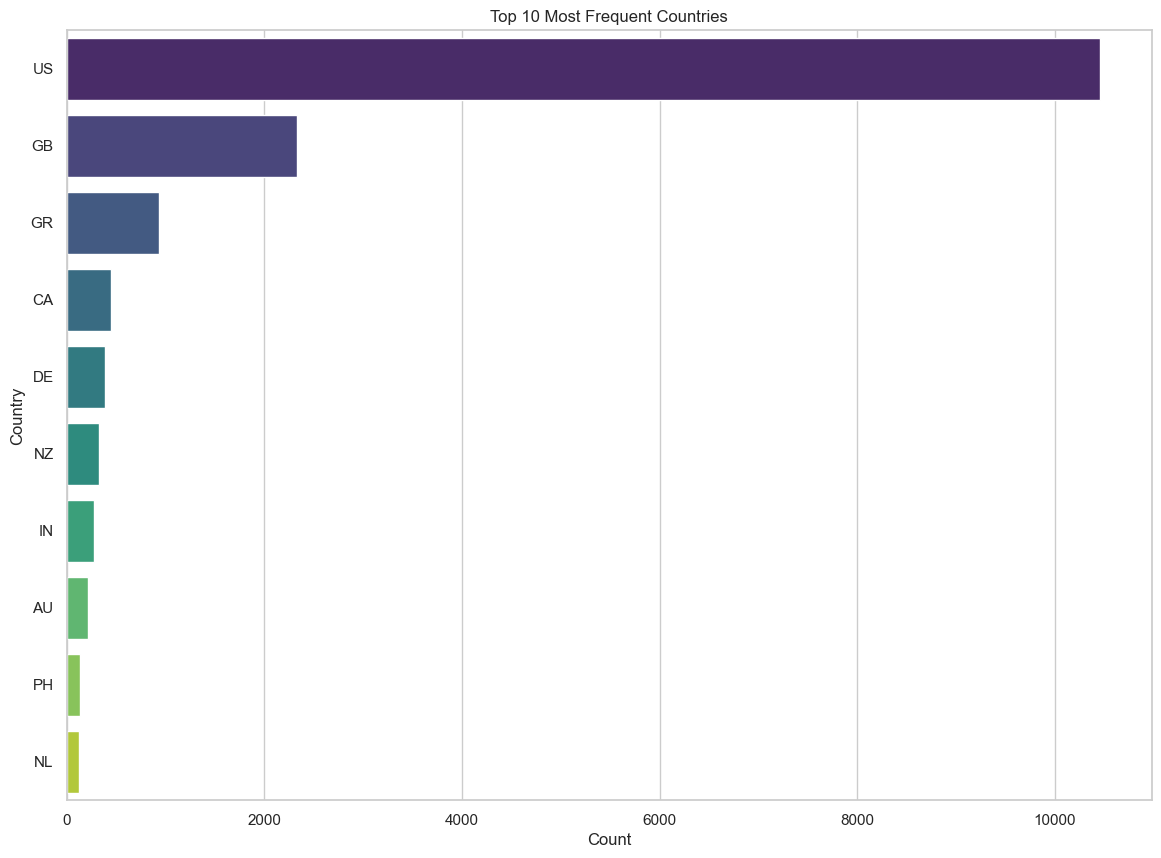

In [36]:
# count the occurrences of unique values in the 'country' column
country_counts = df['country'].value_counts()

# Select the top 10 most frequent occurrences
top_10_country = country_counts.head(10)

# Plot the top 10 most frequent occurrences as horizontal bar plot with rotated labels
plt.figure(figsize=(14, 10))
sns.barplot(y=top_10_country.index, x=top_10_country.values, palette='viridis')
plt.ylabel('Country')
plt.xlabel('Count')
plt.title('Top 10 Most Frequent Countries')
plt.savefig("static/images/barplot_country_count.png")
plt.show()

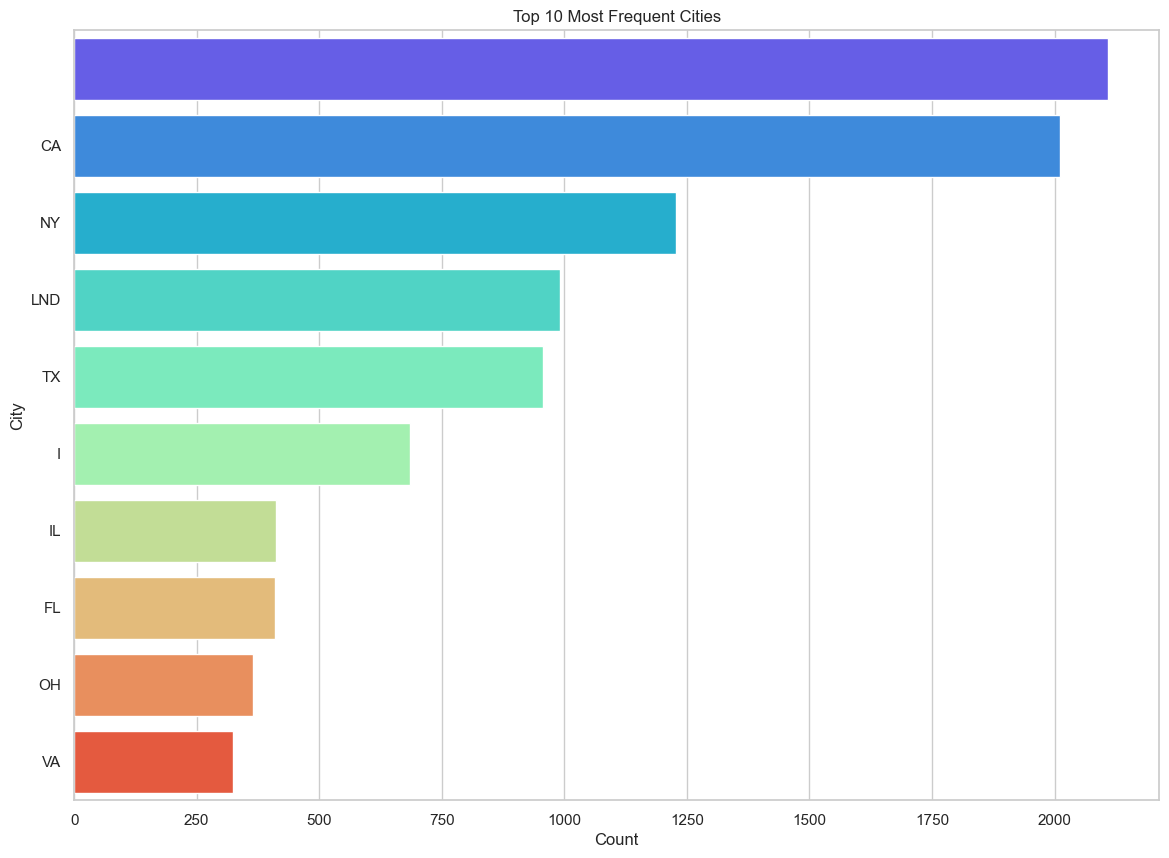

In [37]:
# Count the occurrences of unique values in the 'city column
city_counts = df['city'].value_counts()

# Select the top 10 most frequent occurrences
top_10_city = city_counts.head(10)

# Plot the top 10 most frequent occurrences as horizontal bar plot with rotated label
plt.figure(figsize=(14, 10))
sns.barplot(y=top_10_city.index, x=top_10_city.values, palette='rainbow')
plt.ylabel('City')
plt.xlabel('Count')
plt.title('Top 10 Most Frequent Cities')
plt.savefig("static/images/barplot_city_count.png")
plt.show()

In [38]:
df

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,city
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,US,NY
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NZ,
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,US,IA
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US,DC
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US,FL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0,CA,ON
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,US,PA
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0,US,TX
17878,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0,NG,LA


## Data Manipulating - Handling Missing Values

In [39]:
# Show the total number of null values in the columns
df.isnull().sum()

title                      0
location                 341
department             11328
salary_range           14772
company_profile         3282
description                1
requirements            2649
benefits                7108
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3428
required_experience     6962
required_education      8009
industry                4837
function                6363
fraudulent                 0
country                  341
city                     432
dtype: int64

## Fill them with space ' '

In [40]:
# Fill the null values with a space ' '
df.fillna(" ", inplace=True)

# Show again the total number of null values to ensure they are filled in completely
df.isnull().sum()

title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
country                0
city                   0
dtype: int64

In [41]:
df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,city
0,Marketing Intern,"US, NY, New York",Marketing,,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0,US,NY
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ,
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,,,,,,0,US,IA
3,Account Executive - Washington DC,"US, DC, Washington",Sales,,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US,DC
4,Bill Review Manager,"US, FL, Fort Worth",,,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US,FL


## Concatenating the needed object Columns for Job Posting in one column

In [42]:
# List of column to concatenate
columns_to_concat = ['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']

# concatenate the values of specified columns into a new column 'job_posting'
df['job_posting'] = df[columns_to_concat].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

# Create a new DataFrame with columns 'job_posting' and 'fraudulent'
new_df = df[['job_posting', 'fraudulent']].copy()

new_df.head(10)

,job_posting,fraudulent
0,"Marketing Intern US, NY, New York Marketing ...",0
1,"Customer Service - Cloud Video Production NZ, ...",0
2,"Commissioning Machinery Assistant (CMA) US, IA...",0
3,"Account Executive - Washington DC US, DC, Wash...",0
4,"Bill Review Manager US, FL, Fort Worth Spo...",0
5,"Accounting Clerk US, MD, Job OverviewAp...",0
6,"Head of Content (m/f) DE, BE, Berlin ANDROIDPI...",0
7,"Lead Guest Service Specialist US, CA, San F...",0
8,"HP BSM SME US, FL, Pensacola Solutions3 is...",0
9,"Customer Service Associate - Part Time US, AZ...",0


## Cleaning

In [43]:
# text preprocessing (cleaning)

def preprocess_text(text):
  # convert to lowercasae
  text = text.lower()
  
  # Remove all URLs
  text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
  
  # Remove special characters
  text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
  
  # Remove punctuation
  text = re.sub(r'[^\w\s]', '', text)
  
  # Remove digits
  text = re.sub(r'\d', '', text)
  
  # Remove stop words
  stop_words = set(stopwords.words('english'))
  words = [word for word in text.split() if word.lower() not in stop_words]
  text = ' '.join(words)
  
  return text

# Apply the combined function to the 'job_posting' column
new_df['job_posting'] = new_df['job_posting'].apply(preprocess_text)
  

## Exporting the new DataFrame into CSV

In [44]:
new_df.to_csv('cleaned_data.csv', index=False)

In [45]:
new_df.head(18)

,job_posting,fraudulent
0,marketing intern us ny new york marketing food...,0
1,customer service cloud video production nz auc...,0
2,commissioning machinery assistant cma us ia we...,0
3,account executive washington dc us dc washingt...,0
4,bill review manager us fl fort worth spotsourc...,0
5,accounting clerk us md job overviewapex enviro...,0
6,head content mf de berlin androidpit founded f...,0
7,lead guest service specialist us ca san franci...,0
8,hp bsm sme us fl pensacola solutions womanowne...,0
9,customer service associate part time us az pho...,0


In [46]:
Fake = new_df[new_df['fraudulent'] == 1]

In [47]:
Fake.head()

,job_posting,fraudulent
98,ice technician us stocton ca oil energy staffi...,1
144,forward cap group raised fund purchase homes s...,1
173,technician instrument controls us power plant ...,1
180,sales executive pk sd karachi sales sales exec...,1
215,ice technician mt poso us ca bakersfield ca mt...,1


In [48]:
Real = new_df[new_df['fraudulent'] == 0]

In [49]:
Real.head()

,job_posting,fraudulent
0,marketing intern us ny new york marketing food...,0
1,customer service cloud video production nz auc...,0
2,commissioning machinery assistant cma us ia we...,0
3,account executive washington dc us dc washingt...,0
4,bill review manager us fl fort worth spotsourc...,0


## Create a WordCloud for Non-Fraudulent Job Postings

In [50]:
# Concatenate all job postings into a single string
text_Real = ' '.join(Real['job_posting'])

In [51]:
text_Real[:500]

'marketing intern us ny new york marketing food weve created groundbreaking awardwinning cooking site support connect celebrate home cooks give everything need one placewe top editorial business engineering team focused using technology find new better ways connect people around specific food interests offer superb highly curated information food cooking attract talented home cooks contributors country also publish wellknown professionals like mario batali gwyneth paltrow danny meyer partnerships'

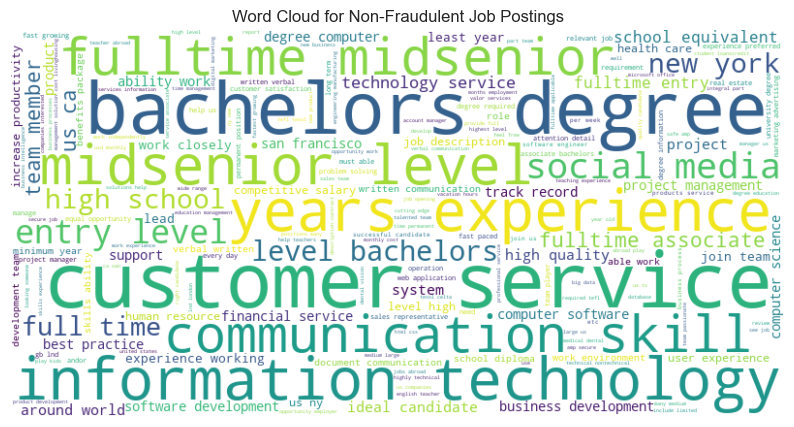

In [52]:
from wordcloud import WordCloud

# Create a WordCloud object
wc = WordCloud(width=800, height=400, background_color='white').generate(text_Real)

# Display the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-Fraudulent Job Postings')
plt.savefig("static/images/wordcloud_nonfraudulentjobs.png")
plt.show()

## Create a WordCloud for Fraudulent Job Postings

In [53]:
# Concatenate all job postings into a single string
text_Fake = ' '.join(Fake['job_posting'])
text_Fake[:500]

'ice technician us stocton ca oil energy staffing amp recruiting done right oil amp energy industryrepresented candidates automatically granted following perks expert negotiations behalf maximizing compensation package implimenting ongoing increases significant signing bonus refined resources addition potential signing bonuses client companies offer year access anyperk significant corporate discounts cell phones event tickets house cleaning everything inbetween youll save thousands daily expendit'

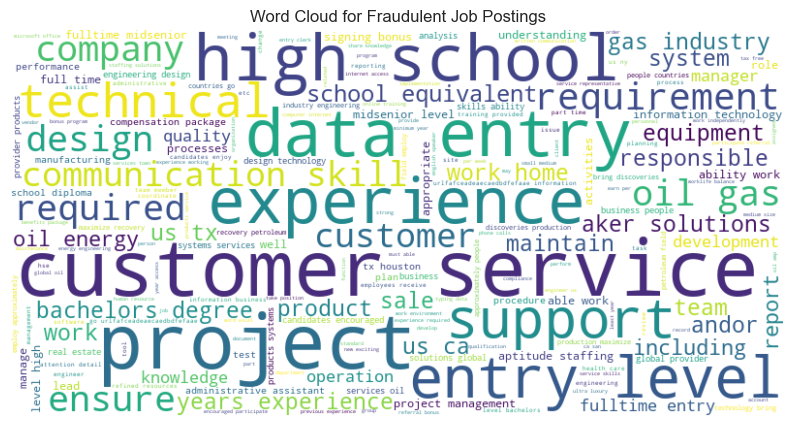

In [54]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_Fake)
# Display the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Fraudulent Job Postings')
plt.savefig("static/images/wordcloud_fraudulentjobs.png")
plt.show()

## Tokenization

In [55]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize

# Tokenize each job posting into words
new_df['job_posting_tokens'] = new_df['job_posting'].apply(word_tokenize)

# Tokenize each job posting into sentences
new_df['job_posting_sentences'] = new_df['job_posting'].apply(sent_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mimi_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [56]:
new_df.head()

,job_posting,fraudulent,job_posting_tokens,job_posting_sentences
0,marketing intern us ny new york marketing food...,0,"[marketing, intern, us, ny, new, york, marketi...",[marketing intern us ny new york marketing foo...
1,customer service cloud video production nz auc...,0,"[customer, service, cloud, video, production, ...",[customer service cloud video production nz au...
2,commissioning machinery assistant cma us ia we...,0,"[commissioning, machinery, assistant, cma, us,...",[commissioning machinery assistant cma us ia w...
3,account executive washington dc us dc washingt...,0,"[account, executive, washington, dc, us, dc, w...",[account executive washington dc us dc washing...
4,bill review manager us fl fort worth spotsourc...,0,"[bill, review, manager, us, fl, fort, worth, s...",[bill review manager us fl fort worth spotsour...


## Part of speech Tagging (POS)
assigns a grammatrical category such as noun, verb, adjective etc., to each word in a text corpus

In [57]:
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag

# perform POS tagging
def pos_tagging(sentence):
  tokens = word_tokenize(sentence)
  tagged_tokens = pos_tag(tokens)
  return tagged_tokens

# Apply POS tagging to each sentence in 'job_posting_sentences' column
new_df['job_posting_pos_tagged'] = new_df['job_posting_sentences'].apply(lambda x: [pos_tagging(sentence) for sentence in x])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mimi_\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [58]:
new_df.head()

,job_posting,fraudulent,job_posting_tokens,job_posting_sentences,job_posting_pos_tagged
0,marketing intern us ny new york marketing food...,0,"[marketing, intern, us, ny, new, york, marketi...",[marketing intern us ny new york marketing foo...,"[[(marketing, NN), (intern, JJ), (us, PRP), (n..."
1,customer service cloud video production nz auc...,0,"[customer, service, cloud, video, production, ...",[customer service cloud video production nz au...,"[[(customer, NN), (service, NN), (cloud, NN), ..."
2,commissioning machinery assistant cma us ia we...,0,"[commissioning, machinery, assistant, cma, us,...",[commissioning machinery assistant cma us ia w...,"[[(commissioning, VBG), (machinery, NN), (assi..."
3,account executive washington dc us dc washingt...,0,"[account, executive, washington, dc, us, dc, w...",[account executive washington dc us dc washing...,"[[(account, NN), (executive, NN), (washington,..."
4,bill review manager us fl fort worth spotsourc...,0,"[bill, review, manager, us, fl, fort, worth, s...",[bill review manager us fl fort worth spotsour...,"[[(bill, NN), (review, NN), (manager, NN), (us..."


## N-Grams
n-Grams are contiguous sequences of n items, typically used in the context of natural language processing where the items are words

In [59]:
# Function to tgenerate n-grams from a list of tokens

from nltk.util import ngrams

def generate_ngrams(tokens, n):
  return list(ngrams(tokens, n))

# Define the value of n for the n-grams
n = 2

# Apply n-gram generation to the 'job_posting_tokens' column
new_df['job_posting_ngrams'] = new_df['job_posting_tokens'].apply(lambda x: generate_ngrams(x, n))

In [60]:
# display DataFrame after applying N-Grams
new_df.head()

,job_posting,fraudulent,job_posting_tokens,job_posting_sentences,job_posting_pos_tagged,job_posting_ngrams
0,marketing intern us ny new york marketing food...,0,"[marketing, intern, us, ny, new, york, marketi...",[marketing intern us ny new york marketing foo...,"[[(marketing, NN), (intern, JJ), (us, PRP), (n...","[(marketing, intern), (intern, us), (us, ny), ..."
1,customer service cloud video production nz auc...,0,"[customer, service, cloud, video, production, ...",[customer service cloud video production nz au...,"[[(customer, NN), (service, NN), (cloud, NN), ...","[(customer, service), (service, cloud), (cloud..."
2,commissioning machinery assistant cma us ia we...,0,"[commissioning, machinery, assistant, cma, us,...",[commissioning machinery assistant cma us ia w...,"[[(commissioning, VBG), (machinery, NN), (assi...","[(commissioning, machinery), (machinery, assis..."
3,account executive washington dc us dc washingt...,0,"[account, executive, washington, dc, us, dc, w...",[account executive washington dc us dc washing...,"[[(account, NN), (executive, NN), (washington,...","[(account, executive), (executive, washington)..."
4,bill review manager us fl fort worth spotsourc...,0,"[bill, review, manager, us, fl, fort, worth, s...",[bill review manager us fl fort worth spotsour...,"[[(bill, NN), (review, NN), (manager, NN), (us...","[(bill, review), (review, manager), (manager, ..."


In [61]:
new_df.columns

Index(['job_posting', 'fraudulent', 'job_posting_tokens',
       'job_posting_sentences', 'job_posting_pos_tagged',
       'job_posting_ngrams'],
      dtype='object')

## Splitting

In [62]:
from sklearn.model_selection import train_test_split

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_df['job_posting_tokens'], new_df['fraudulent'], test_size=0.2, random_state=42)

## Vectorize the text data

In [63]:
# the purpose that we need one sequence the has key feature from each text in column 'job_posting_tokens' for task classification  

from sklearn.feature_extraction.text import CountVectorizer

# Flatten the list of lists into a single list of strings
X_train_flattened = [' '.join(sublist) for sublist in X_train]

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train_flattened)

# Flatten the list of lists into a single list of strings for test data
X_test_flattened = [' '.join(sublist) for sublist in X_test]
X_test_vec = vectorizer.transform(X_test_flattened)

In [64]:
X_train_flattened[0]

'mediumheavy duty gas diesel technician us bourne service majors rv premier rv service center south shore cape islands accepting applications mediumheavy duty gas diesel technician fill full time year round position superior mechanical aptitude sound diagnostic reasoning skillsmassachusetts cdl class b willingness attain onemassachusetts state inspection license willingness attain oneattention detail computer literacystrong customer service communication skillsexcellent work driving safety recordwith minimum years experience pr aggressive pay package right candidatehealth insurance uniforms k matching controbution two years fulltime midsenior level vocational automotive'

In [65]:
X_train

5054     [mediumheavy, duty, gas, diesel, technician, u...
10649    [junior, account, manager, gr, athens, atcom, ...
10262    [customer, service, associate, part, time, us,...
7750     [project, manager, us, ca, san, francisco, bus...
17514    [web, graphic, designer, gb, nyk, scarborough,...
                               ...                        
11415    [online, performance, analyst, il, tel, aviv, ...
12107    [database, developer, se, visby, need, awesome...
5415     [delivery, driver, ca, concord, candidate, del...
863      [python, oracle, teradata, java, jee, linux, s...
16035    [reporter, agri, investor, us, ny, new, york, ...
Name: job_posting_tokens, Length: 14079, dtype: object

In [66]:
# Ensure the shape of X_train_vec matches the number of samples in X_train
print("Shape of X_train_vec:", X_train_vec.shape)
print("Number of samples in X_train:", X_train.shape[0])

# Ensure the shape of X_test_vec matches the number of samples in X_test
print("Shape of X_test_vec:", X_test_vec.shape)
print("Number of samples in X_test:", X_test.shape[0])

Shape of X_train_vec: (14079, 137722)
Number of samples in X_train: 14079
Shape of X_test_vec: (3520, 137722)
Number of samples in X_test: 3520


In [67]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_vec, y_train, test_size=0.2, random_state=42)

## LogisticRegression

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the logistic regression model
logistic_regression = LogisticRegression() 
# logistic_regression.fit(X_train, y_train)
logistic_regression.fit(X_train, y_train)

# Predict on the testing set
y_pred = logistic_regression.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Get the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9829545454545454
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2692
           1       0.92      0.67      0.78       124

    accuracy                           0.98      2816
   macro avg       0.95      0.83      0.88      2816
weighted avg       0.98      0.98      0.98      2816

Confusion Matrix:
[[2685    7]
 [  41   83]]


{'0': {'precision': 0.9849596478356566, 'recall': 0.9973997028231798, 'f1-score': 0.991140642303433, 'support': 2692.0}, '1': {'precision': 0.9222222222222223, 'recall': 0.6693548387096774, 'f1-score': 0.7757009345794392, 'support': 124.0}, 'accuracy': 0.9829545454545454, 'macro avg': {'precision': 0.9535909350289394, 'recall': 0.8333772707664286, 'f1-score': 0.8834207884414361, 'support': 2816.0}, 'weighted avg': {'precision': 0.9821970623327924, 'recall': 0.9829545454545454, 'f1-score': 0.9816539506280866, 'support': 2816.0}}


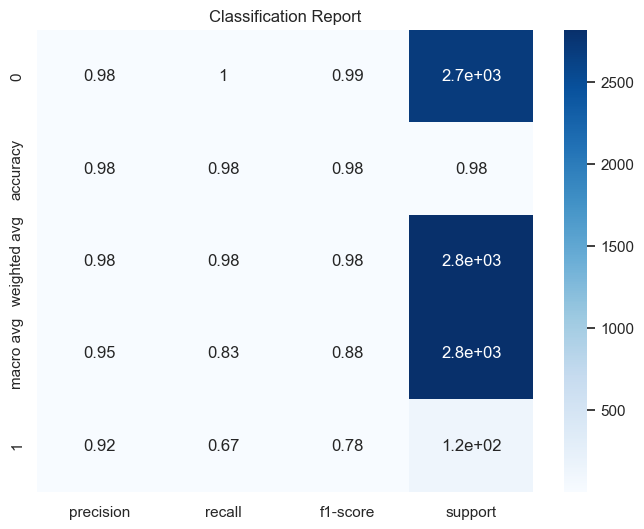

In [69]:
# Get the classification report
report = classification_report(y_test, y_pred, output_dict=True)
print(report)
df_classification_report = pd.DataFrame(report).transpose()
df_classification_report = df_classification_report.sort_values(by=['f1-score'], ascending=False)
plt.figure(figsize=(8, 6))
sns.heatmap(df_classification_report, annot=True, cmap='Blues')
plt.title("Classification Report")
plt.savefig("static/images/classification_report.png")
plt.show()

Confusion Matrix:
[[2685    7]
 [  41   83]]


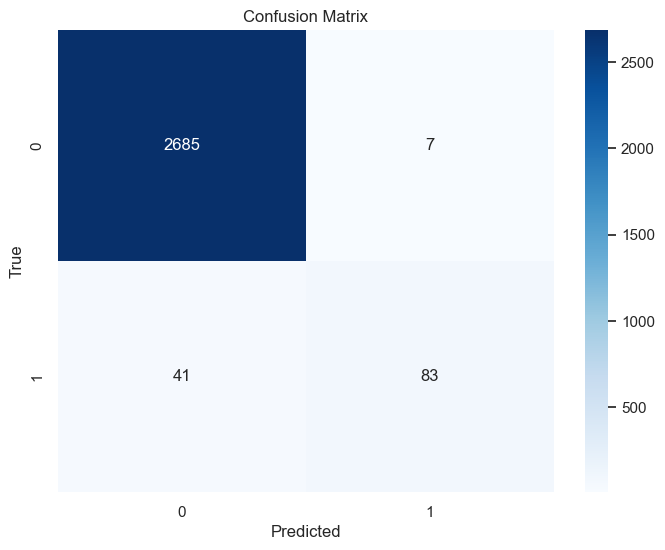

In [70]:
# Print the confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix")
plt.savefig("static/images/confusion_matrix.png")
plt.show()

In [71]:
## Save the Model

In [78]:
# RERUNNING THE MODEL TRAINING IN LOGISTIC REGRESSION
# Create 2nd model for importing and train the logistic regression model
logistic_regression2 = LogisticRegression() 
# logistic_regression.fit(X_train, y_train)
logistic_regression2.fit(X_train, y_train)

LogisticRegression()

In [79]:
import pickle
# Save the trained model as a pickle string
with open('model.pkl', 'wb') as file:
  pickle.dump(logistic_regression2, file)

In [80]:
with open('vectorizer.pkl', 'wb') as f:
  pickle.dump(vectorizer, f)